In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('categorical.csv', index_col=0)
df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_level
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize,3
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize,3
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize,3
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize,2
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize,1


In [6]:
df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
policy_level         int64
dtype: object

In [7]:
categorical = df.select_dtypes('object')
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal,Offer3,Branch,Four-Door Car,Large


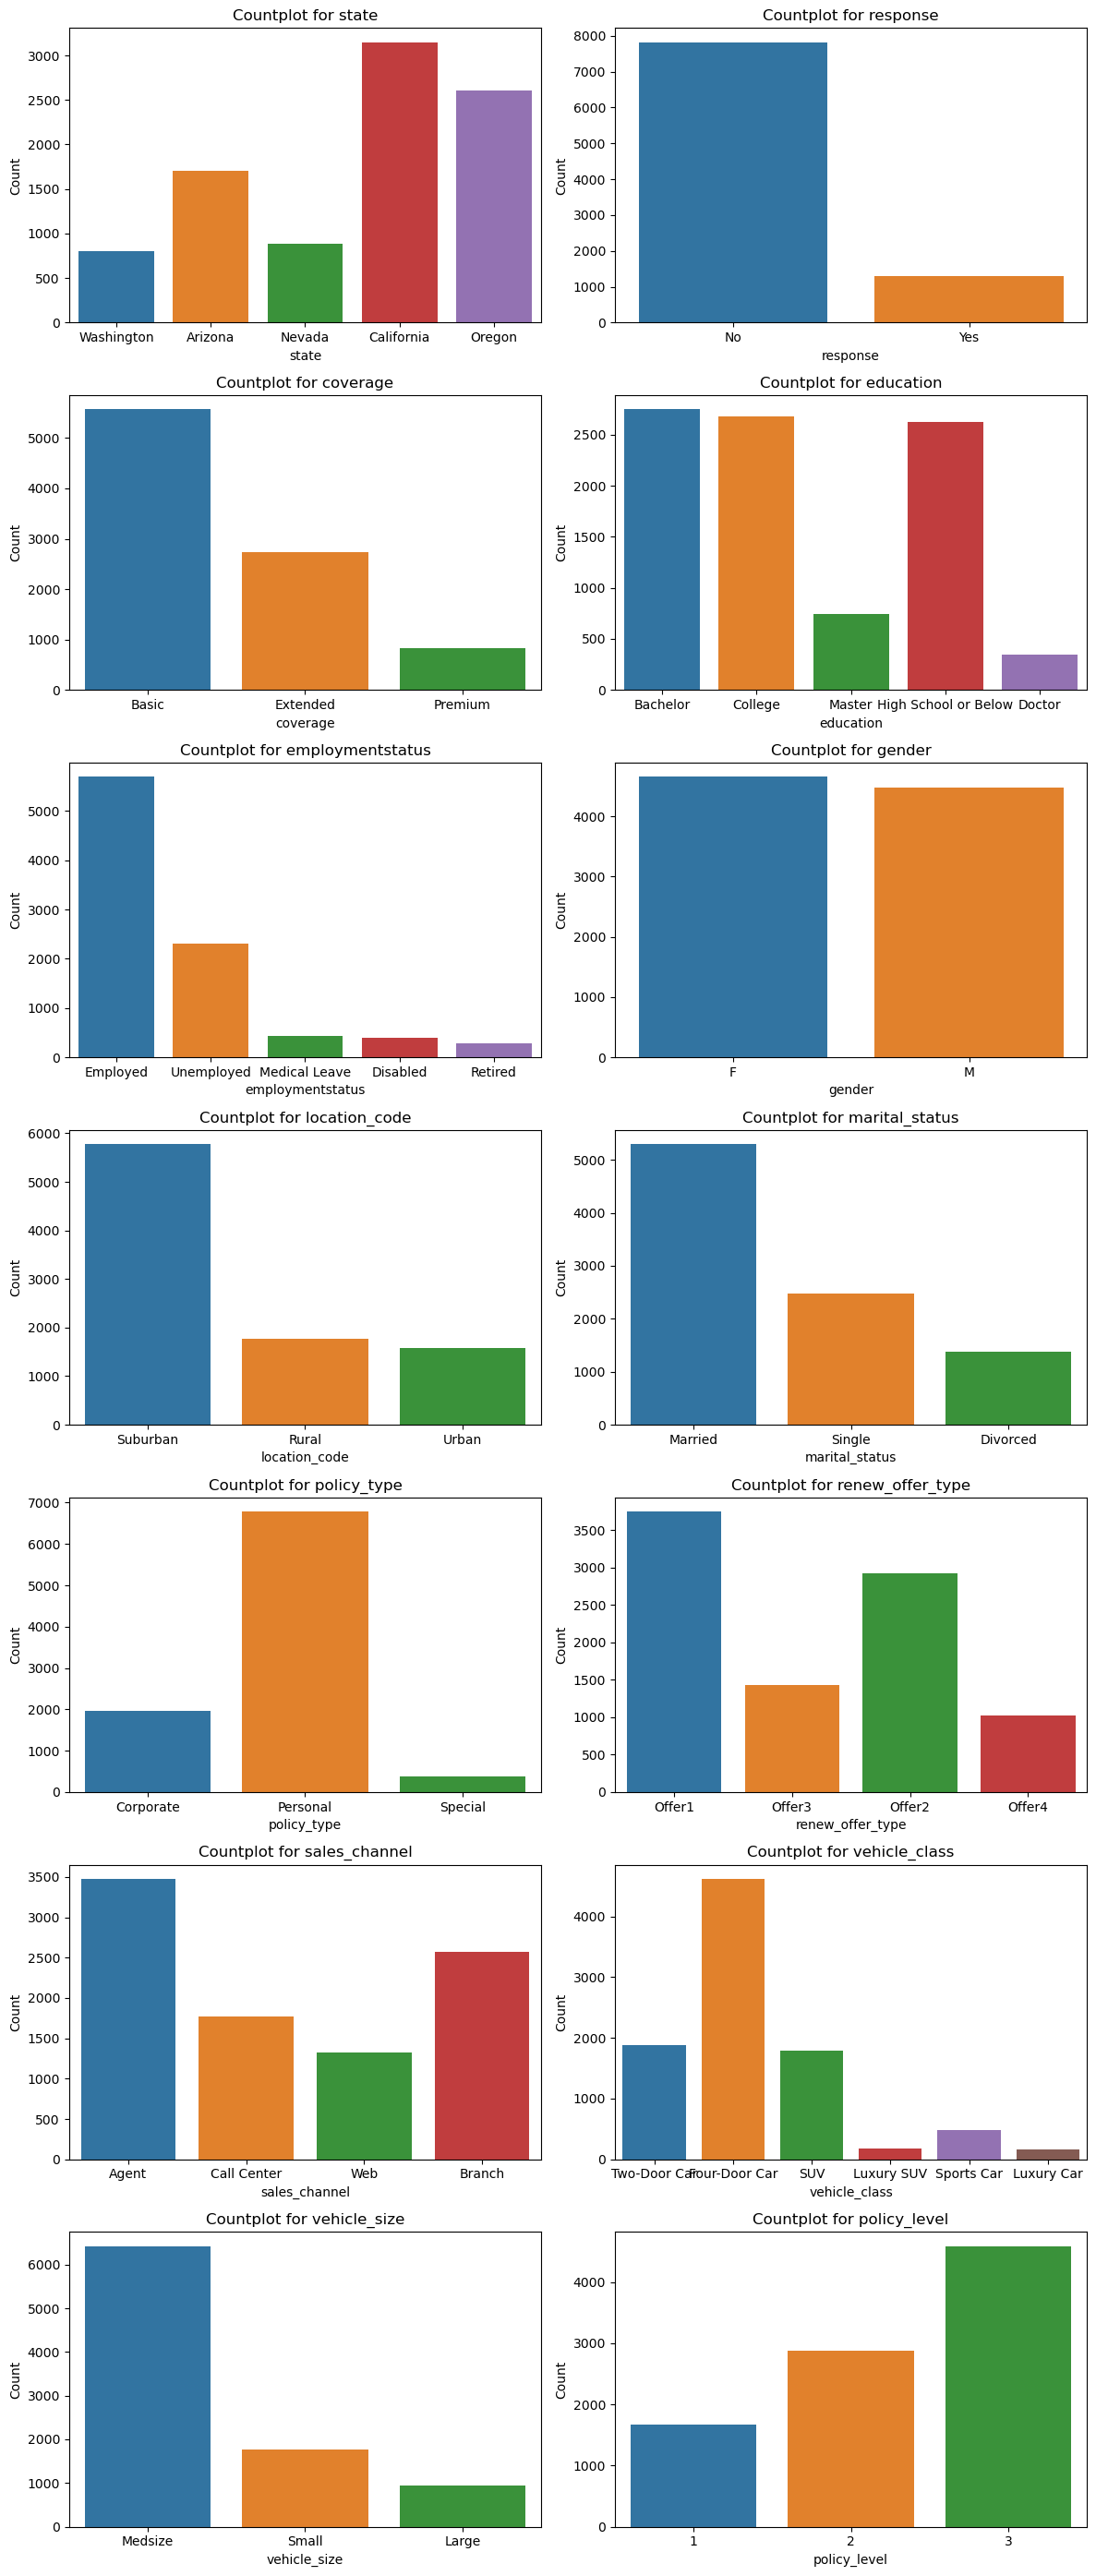

In [10]:
num_cols = df.shape[1]
num_rows = (num_cols - 1) // 2 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, (col_name, ax) in enumerate(zip(df.columns, axes)):
    sns.countplot(data=df, x=col_name, ax=ax)
    ax.set_title(f'Countplot for {col_name}')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- #### From looking at the plots, I can see values that can be merged together, such as vehicle_class, employmentstatus and education for example, so we have the cat data grouped into smaller sections.

In [12]:
print(df['vehicle_class'].unique())
print(df['employmentstatus'].unique())
print(df['education'].unique())

['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


- #### Questions 4 and 5, I cannot find time variable.